Código que lê um arquivo .csv contendo os valores das energias obtidas pelo Mathematica e faz um gráfico da energia em função dos seus parâmetros variacionais. 
É feita uma interpolação a partir dos dados lidos, para obter um valor melhor da energia.

In [2]:
import pylab as plt
import numpy as np
from scipy.interpolate import interp2d
import csv

In [3]:
nome_do_arquivo = 'nanorod_3.54.csv' # arquivo que desejamos ler
E_input = [] # valores da energia lidos do arquivo nome_do_arquivo

with open(nome_do_arquivo) as file:
    data = list(csv.reader(file))
    
    # leitura dos parâmetros
    a = float(data[0][0])
    lambIni = float(data[0][1])
    lambFin = float(data[0][2])
    lambN = int(data[0][3])
    betaIni = float(data[0][4])
    betaFin = float(data[0][5])
    betaN = int(data[0][6])
    
    # leitura das energias
    for linha in data[1:]:
        aux = []
        for elem in linha:
            aux.append(float(elem))
        E_input.append(aux)

In [4]:
beta_range = np.linspace(betaIni, betaFin, betaN) # range em beta de nome_do_arquivo
lamb_range = np.linspace(lambIni, lambFin, lambN) # range em lambda de nome_do_arquivo

interp = interp2d(lamb_range, beta_range, E_input, kind='cubic') # interpolação cúbica

beta_range = np.linspace(betaIni, betaFin, 1000) # novo range em beta
lamb_range = np.linspace(lambIni, lambFin, 1000) # novo range em lambda

Es = interp(lamb_range, beta_range) # valores de energia para os novos ranges

In [5]:
energia = np.amin(Es) # energia de ligação
lamb = lamb_range[np.where(Es == np.amin(Es))[1][0]] # lambda da energia de ligação
beta = beta_range[np.where(Es == np.amin(Es))[0][0]] # beta da energia de ligação

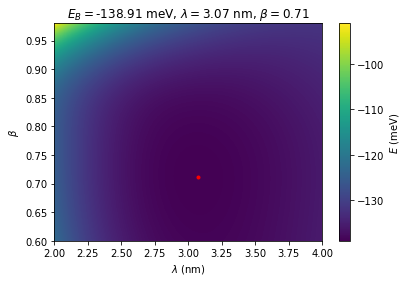

In [6]:
nome = "nanorod_" + str(round(a, 2)) + ".svg" # nome da imagem que será gerada
fig, ax = plt.subplots(1)
im = ax.imshow(Es, origin='lower',
               extent=[lambIni, lambFin, betaIni, betaFin], aspect='auto')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\beta$')
cb = plt.colorbar(im)
cb.set_label(r'$E$ (meV)')
plt.title(r'$E_B = $' + str(round(energia, 2)) + ' meV, ' +\
          r'$\lambda = $' + str(round(lamb, 2)) + ' nm, ' +\
          r'$\beta = $' + str(round(beta, 2)))
plt.plot(lamb, beta, color='red', marker='.')
plt.savefig(nome)
plt.show()